# Single-Cell Annotation

## Packages

In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Cell Data

In [2]:
adata = sc.read_h5ad('../03.CellFiltering/study1_filt_clust.h5ad')
adata

AnnData object with n_obs × n_vars = 165585 × 4095
    obs: 'sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'Group', 'Drug', 'Dose', 'Description'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

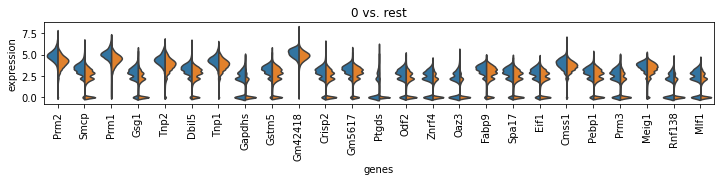

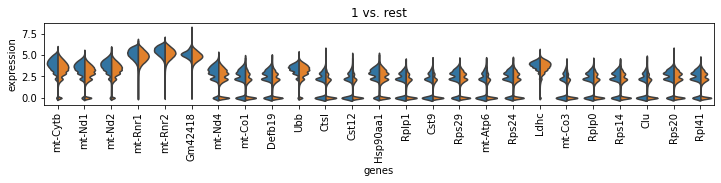

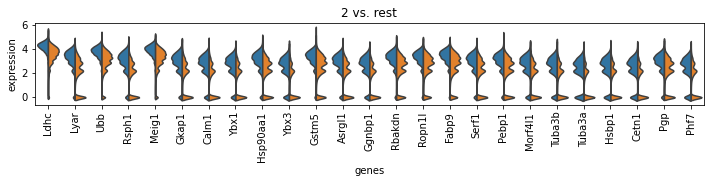

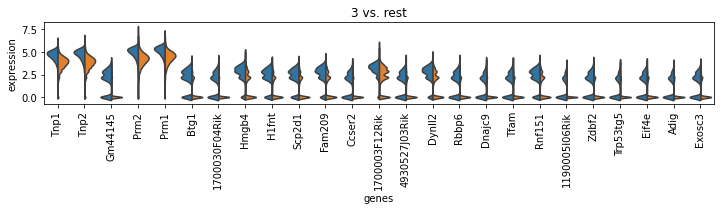

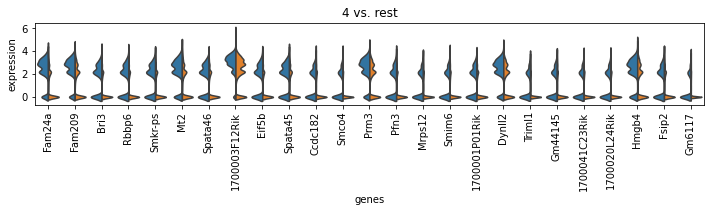

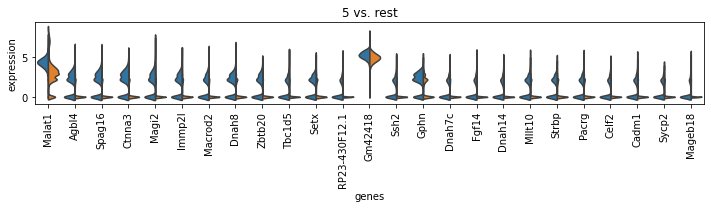

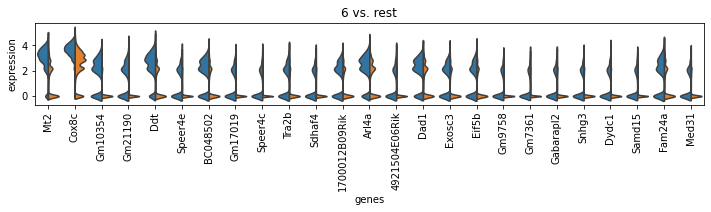

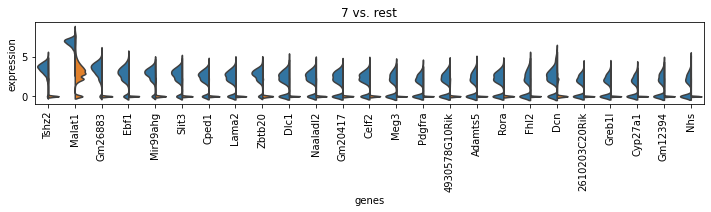

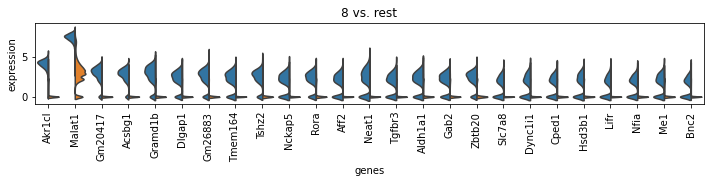

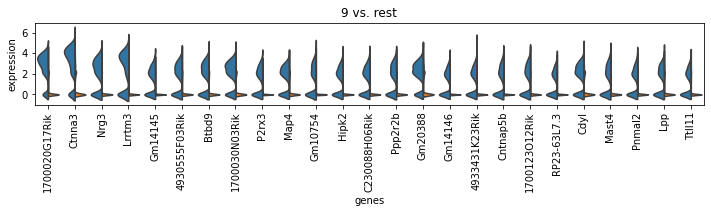

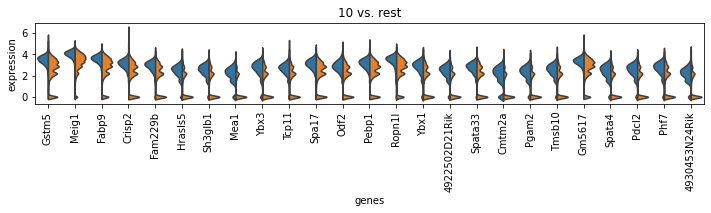

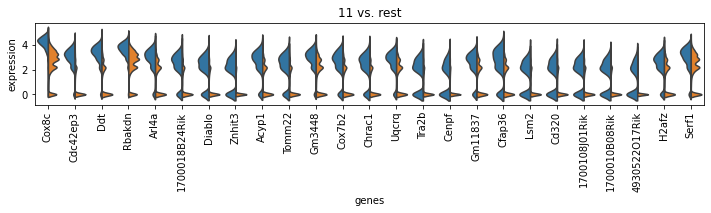

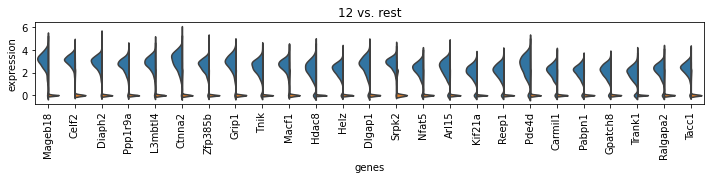

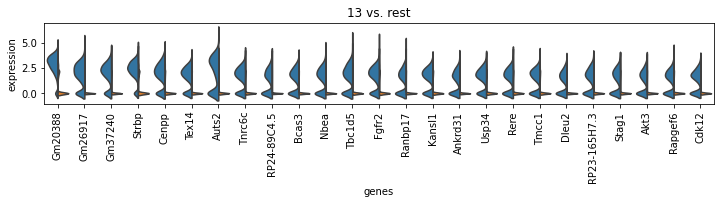

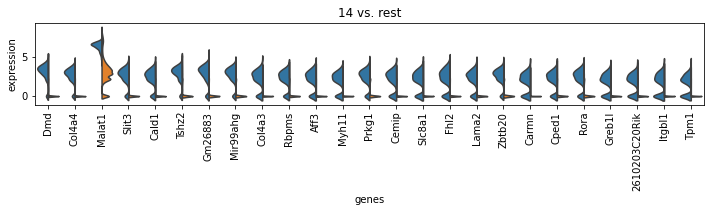

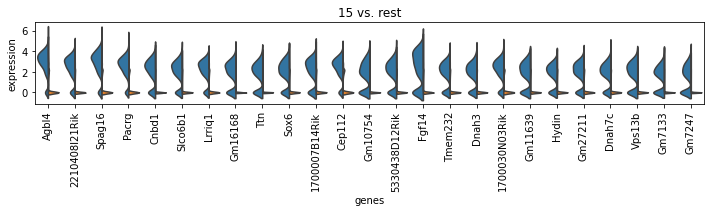

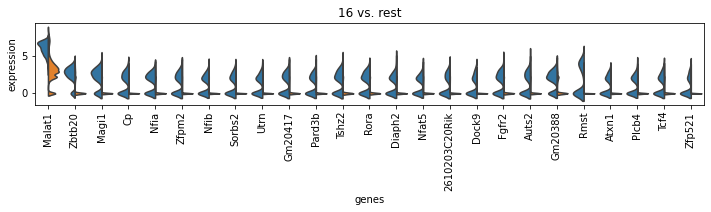

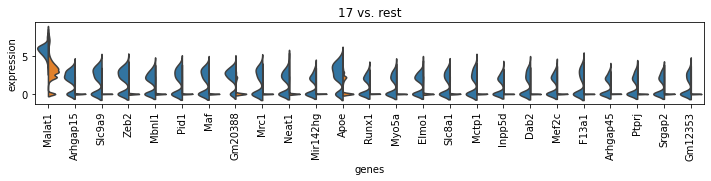

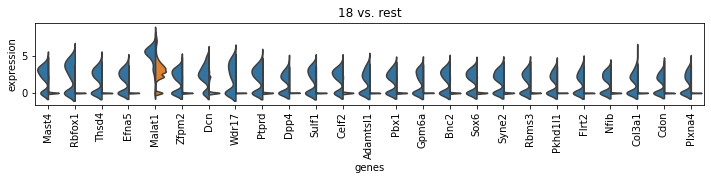

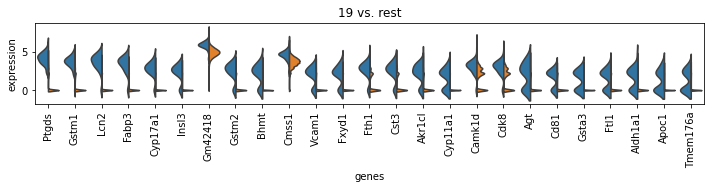

In [3]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (12, 1.5)}):
    sc.pl.rank_genes_groups_violin(adata, n_genes=25, strip=False)

## Candidate Markers

In [4]:
# Murat Publication Markers:
    # Sertoli Markers (CLU, WT1, REEP1)
    # Pertibular Cells (TAGLN, ACTA2)
    # Endothelial Cells (CD34, TM4SF1)
    # Macrophage Cells (APOE, CD74)
    # Leydig Cells (STAR, CYP11A1)
    # Spermatogonia (STRA8)
    # Differentiated Spermatogonia (DMRT1)
    # Undifferentiated Spermatogonia (GFRA1, PIWIL4)
    # Leptotene Spermatocytes (SYCE1)
    # Zygotene Spermatocytes (SYCP1)
    # Pachytene Spermatocytes (PIWIL1)
    # Spermatocytes (SYCP2, TANK, AURKA)
    # Early Round Spermatids (LRRIQ1)
    # Late Round Spermatids (ACRV1, SPACA1)
    # Elongated Spermatids (SPATA3, NRBP1, PRM1, GABBR2)
# Murat TopMarkers:
    # Leydig: ['Nat8f7','Snhg11','Tmem164','Alas1','Fam129a','Prlr','Ass1','Sult1e1','Cobll1','Fads1','Gpt2','Pank1','Plac1','Msmo1','Bhmt','Slc7a8','Acvr1','Hsd17b3','Ephx1','Ldlr','Hmgcs2','Bnc2','Rbm47']
    # Sertoli: ['Wt1','Reep1'],
    # Spermatocytes: ['Tcte2','Kcnk10','Catsperd'],
    # Spermatogonia:['Prss50','Gm364','Epcam','Tsc22d3'],


In [5]:
# Lukassen Markers:
    # Elongated Spermatids: ['Plxna2','Git1'],
    # Spermatogonia:['Prss50','Gm364','Epcam','Tsc22d3'],
    # Spermatogonia: ['Zbtb16','Bmi1','Adgra3'],
    # Spermatogonia: ['Crabp1', 'Hist1h1a', 'Dazl','Nanos3','Hist1h3a','Esrp1','Adgra3','Utf1'],
    # Early Spermatogonia: ['Zbtb16','Sox3','Sohlh1','Sohlh2','Bmi1','Nos2','Gfra1','Ret','Cdh1'],

In [6]:
# Hermann
# Spermatoctyes: Dmc1, Hormad1, Mybl1, Spo11
# Undiff Spermatogonia: ['Gfra1', 'Id4', 'Piwil4', and 'Rhox10']
# Diff Spermatogonia: ['Dmrt1','Kit','Nanos3','Rhox13','Stra8']

In [8]:
marker_genes_dict = {'Undifferentiated Spermatogonia M': ['Gfra1','Piwil4','Id4','Rhox10'],
                     'Undifferentiated Spermatogonia H': ['Id4'],
                     #'Early Spermatogonia L': ['Sox3','Sohlh1','Sohlh2','Bmi1','Nos2','Gfra1','Ret','Cdh1'],
                     'Spermatogonia M': ['Stra8'],
                     'Spermatogonia T': ['Prss50','Gm364','Epcam','Tsc22d3'],
                     'Spermatogonia T2': ['Tex101','Gm26917','Prss50','Gm42418','Sycp1','Auts2'],
                     #'Gm42923'
                     'Spermatogonia H': ['Zbtb16','Sall4'],
                     #'Spermatogonia L': ['Bmi1','Adgra3','Crabp1','Hist1h1a','Dazl','Hist1h3a','Esrp1','Adgra3','Utf1'],
                     'Differentiated Spermatogonia H': ['Stra8'],
                     'Differentiated Spermatogonia MH': ['Dmrt1','Kit','Nanos3','Rhox13'],
                     'Spermatocytes M': ['Sycp2','Tank','Aurka'],
                     'Spermatocytes T': ['Tcte2','Kcnk10','Catsperd'],
                     'Spermatocytes H': ['Dmc1', 'Hormad1', 'Mybl1', 'Spo11'],
                     'Leptotene Spermatocytes M': ['Syce1'],
                     'Zygotene Spermatocytes M': ['Sycp1'],
                     'Pachytene Spermatocytes M': ['Piwil1'],
                     'Round Spermatids T': ['Stc1','Ms4a4b','Cylc2','Galntl5'],
                     'Early Round Spermatids M': ['Lrriq1'],
                     'Early Round Spermatids H': ['Ssxb1','Ssxb2','Hsfy2'],
                     'Late Round Spermatids M': ['Acrv1', 'Spaca1'],
                     'Elongated Spermatids M': ['Spata3','Nrbp1','Prm1','Gabbr2'],
                     'Elongated Spermatids T': ['Gm16175','Dnajc17','Ostm1'],

                     'Elongated Spermatids L': ['Plxna2','Git1'],
                     'Leydig M': ['Star','Cyp11a1'],
                     'Leydig T': ['Bhmt','Hsd17b3','Ephx1','Ass1','Sult1e1','Fads1','Snhg11','Tmem164','Alas1','Prlr','Gpt2','Pank1','Plac1','Msmo1','Slc7a8','Acvr1','Ldlr','Hmgcs2','Rbm47'],
                     #'Fam129a','Nat8f7','Cobll1','Bnc2'
                     'Sertoli T': ['Wt1','Reep1','Gatm','Sema5b','Wipf3','Glp2r','Lrp8os2'],
                     'Macrophage M': ['Apoe','Cd74'],
                     'Pertibular M': ['Tagln','Acta2'],
                     'Endothelial M': ['Cd34','Tm4sf1'],
                    }
marker_genes_dict2 = {'Spermatogonia': ['Stra8','Gfra1','Piwil4','Id4','Rhox10','Prss50','Gm364','Epcam','Tsc22d3','Tex101','Gm26917','Prss50','Gm42418','Sycp1','Auts2','Zbtb16','Sall4','Dmrt1','Kit','Nanos3','Rhox13'],
                     'Spermatocytes': ['Sycp2','Tank','Aurka','Tcte2','Kcnk10','Catsperd','Syce1','Sycp1','Piwil1'],
                     'Round Spermatids': ['Lrriq1','Stc1','Ms4a4b','Cylc2','Galntl5','Acrv1','Spaca1'],
                     'Elongated Spermatids': ['Spata3','Nrbp1','Prm1','Gabbr2','Plxna2','Git1'],
                     'Leydig': ['Star','Cyp11a1','Bhmt','Hsd17b3','Ephx1','Ass1','Sult1e1','Fads1','Snhg11','Tmem164','Alas1','Prlr','Gpt2','Pank1','Plac1','Msmo1','Slc7a8','Acvr1','Ldlr','Hmgcs2','Rbm47'],
                     'Sertoli': ['Wt1','Reep1','Gatm','Sema5b','Wipf3','Glp2r','Lrp8os2'],
                     'Macrophage': ['Apoe','Cd74'],
                     'Pertibular': ['Tagln','Acta2'],
                     'Endothelial': ['Cd34','Tm4sf1'],
                    }

Text(0, 0.5, 'Cluster')

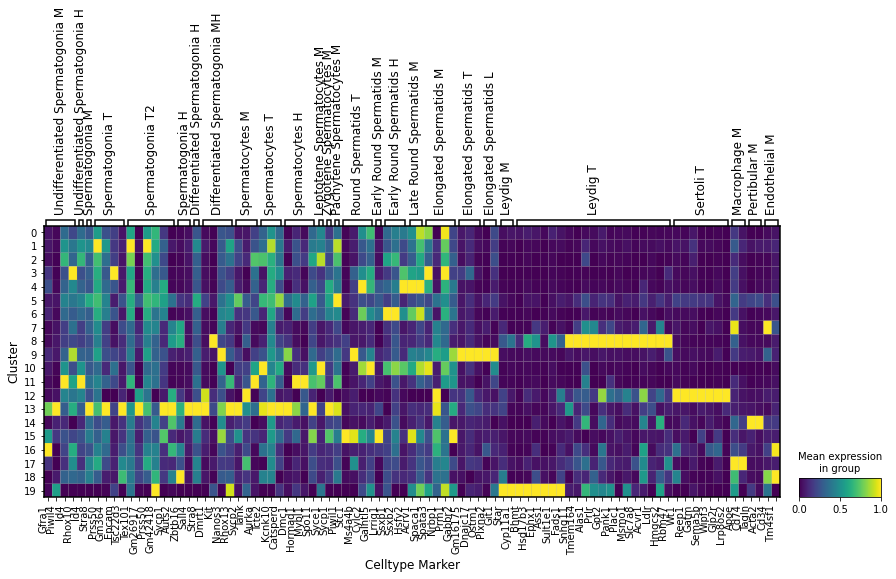

In [9]:
plt.rcParams.update({'font.size': 12})
g = sc.pl.matrixplot(adata,marker_genes_dict,'leiden',standard_scale='var',var_group_rotation=90,figsize=(15,5),return_fig=True)
ax = g.get_axes()['mainplot_ax']
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right',fontsize=10)
ax.set_xlabel('Celltype Marker')
ax.set_ylabel('Cluster')

Text(0, 0.5, 'Cluster')

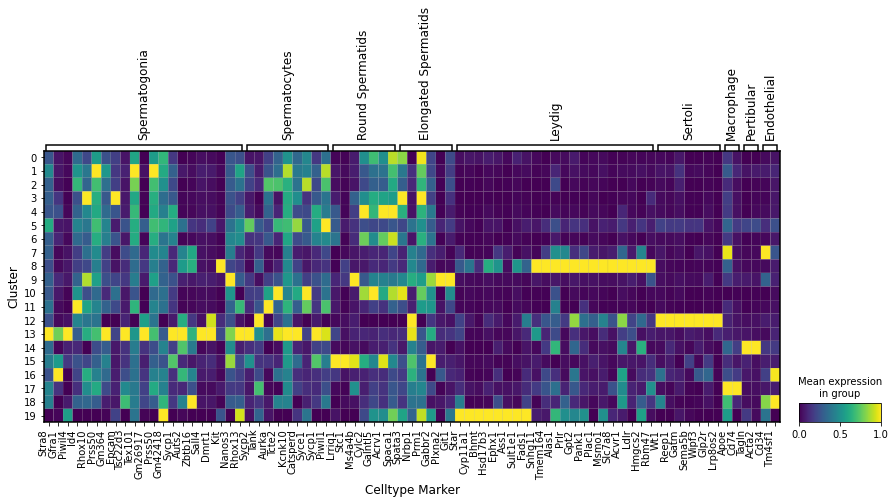

In [10]:
plt.rcParams.update({'font.size': 12})
g = sc.pl.matrixplot(adata,marker_genes_dict2,'leiden',standard_scale='var',var_group_rotation=90,figsize=(15,5),return_fig=True)
ax = g.get_axes()['mainplot_ax']
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right',fontsize=10)
ax.set_xlabel('Celltype Marker')
ax.set_ylabel('Cluster')

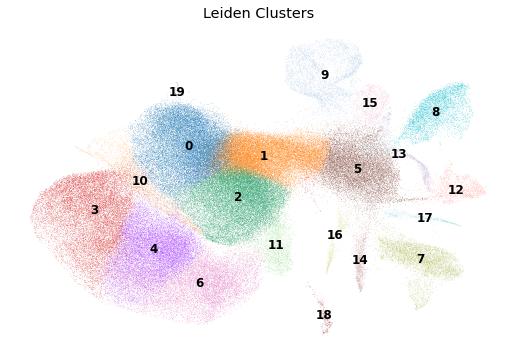

In [11]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (9, 6)}):
    sc.pl.umap(adata,color='leiden',frameon=False,legend_loc='on data',title='Leiden Clusters')

## Cluster Cell-Type Assignment

In [12]:
# Setting Cluster Cell-Type Names
#new_cluster_names = {'0':'Empty','1':'Elongated Spermatids','2':'Spermatocytes','3':'Elongated Spermatids','4':'Empty','5':'Round Spermatids','6':'Round Spermatids','7':'Elongated Spermatids','8':'Leydig','9':'Leydig','10':'Mixed','11':'Sertoli','12':'Pertibular','13':'Spermatocytes','14':'Spermatogonia','15':'Macrophage','16':'Leydig'}
#adata.obs['ann_cluster'] = adata.obs['leiden'].map(new_cluster_names)
#adata.obs
basic_cluster_names = {'0':'Spermatids',
                     '1':'Spermatogonia',
                     '2':'Spermatocytes',
                     '3':'Spermatids',
                     '4':'Spermatids',
                     '5':'Spermatocytes',
                     '6':'Spermatids',
                     '7':'Mixed Somatic',
                     '8':'Leydig',
                     '9':'Spermatids',
                     '10':'Mixed Germ',
                     '11':'Spermatocytes',
                     '12':'Sertoli',
                     '13':'Mixed Germ',
                     '14':'Pertibular',
                     '15':'Spermatids',
                     '16':'Mixed Somatic',
                     '17':'Mixed Somatic',
                     '18':'Endothelial',
                     '19':'Leydig'}

general_cluster_names = {'0':'Spermatids',
                     '1':'Undt: Spermatogonia',
                     '2':'Undt: Spermatocytes',
                     '3':'Eln Spermatids',
                     '4':'Rnd Spermatids',
                     '5':'Spermatocytes',
                     '6':'Rnd Spermatids',
                     '7':'Mixed Somatic',
                     '8':'Leydig',
                     '9':'Eln Spermatids',
                     '10':'Mixed Germ',
                     '11':'Spermatocytes',
                     '12':'Sertoli',
                     '13':'Mixed Germ',
                     '14':'Pertibular',
                     '15':'Rnd Spermatids',
                     '16':'Mixed Somatic',
                     '17':'Mixed Somatic',
                     '18':'Endothelial',
                     '19':'Leydig'}

specific_cluster_names = {'0':'Spermatids',
                     '1':'Undt: Spermatogonia',
                     '2':'Undt: Spermatocytes',
                     '3':'Eln Spermatids',
                     '4':'Late Rnd Spermatids',
                     '5':'Pachytene Spermatocytes',
                     '6':'Early Rnd Spermatids',
                     '7':'Mixed Somatic',
                     '8':'Leydig',
                     '9':'Eln Spermatids',
                     '10':'Mixed Germ',
                     '11':'Spermatocytes',
                     '12':'Sertoli',
                     '13':'Mixed Germ',
                     '14':'Pertibular',
                     '15':'Early Rnd Spermatids',
                     '16':'Mixed Somatic',
                     '17':'Mixed Somatic',
                     '18':'Endothelial',
                     '19':'Leydig'}
# Problem CLusters: 0, 2, 11
# Mixed Germ
    # '3':'Elongated Spermatids/Round Spermatids'
    # '9':'Elongated Spermatids/Round Spermatids'
    # '10':'Spermatids/Leptotene Spermatocytes/Spermatogonia'
    # '13':'Zygotene Spermatocytes/Spermatogonia'
# Mixed Somatic
    # '7':'Macrophage/Endothelial'
    # '16':'Spermatogonia/Endothelial'
    # '18':'Leydig/Endothelial'
adata.obs['ann_cluster0'] = adata.obs['leiden'].map(basic_cluster_names)
adata.obs['ann_cluster'] = adata.obs['leiden'].map(general_cluster_names)
adata.obs['ann_cluster2'] = adata.obs['leiden'].map(specific_cluster_names)

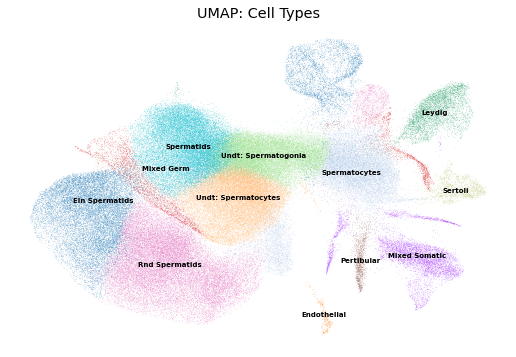

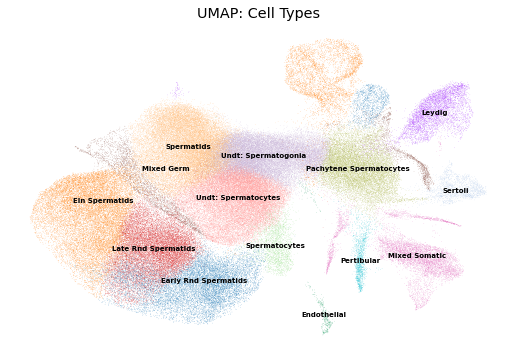

In [13]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (9, 6)}):
    sc.pl.umap(adata,color='ann_cluster',frameon=False,legend_loc='on data', legend_fontsize='xx-small',title="UMAP: Cell Types")
    #plt.savefig('ann_cluster_umap_v2.png', bbox_inches='tight')
    #plt.close()
    sc.pl.umap(adata,color='ann_cluster2',frameon=False,legend_loc='on data', legend_fontsize='xx-small',title="UMAP: Cell Types")
    #plt.savefig('ann_cluster2_umap_v2.png', bbox_inches='tight')
    #plt.close()

Text(0, 0.5, 'Cluster Assignment')

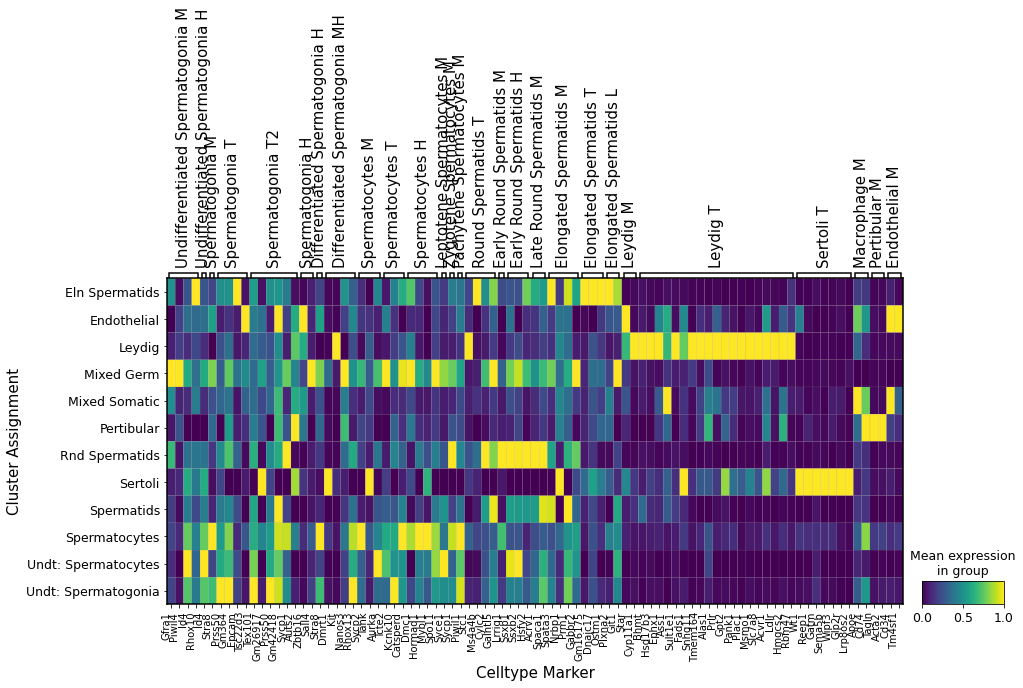

In [14]:
plt.rcParams.update({'font.size': 15})
g = sc.pl.matrixplot(adata,marker_genes_dict,'ann_cluster',standard_scale='var',var_group_rotation=90,figsize=(15,6),return_fig=True)
ax = g.get_axes()['mainplot_ax']
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right',fontsize=10)
ax.set_xlabel('Celltype Marker')
ax.set_ylabel('Cluster Assignment')

## Cell Label Transfer (Murat2021)

In [15]:
# Murat2021 Data
mdata = sc.read_h5ad('murat2021_mousetestis_snrnaseq.v2.h5ad') # reading in data

/home/cbadger/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [16]:
# # Save Leiden Clusters
    # Not needed unless transferring embeddings
# adata.uns['leiden_backup'] = adata.uns['leiden']
# # Save UMAP
# adata.uns['umap_backup'] = adata.uns['umap']
# adata.obsm['X_umap_backup'] = adata.obsm['X_umap']
# # Save PCA
# adata.obsm['X_pca_backup'] = adata.obsm['X_pca']
# adata

In [17]:
adata.var['gene_symbol'] = adata.var_names # saving gene names
adata.var_names = adata.var['gene_ids'] # using ensembl id to match Murat

In [18]:
var_names = mdata.var_names.intersection(adata.var_names) # overlap geneset
mdata = mdata[:, var_names] # filter genes in Murat
adata = adata[:, var_names] # filter genes in main

In [19]:
sc.pp.pca(mdata) # pca for Murat using new geneset

/home/cbadger/.local/lib/python3.8/site-packages/scanpy/preprocessing/_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca


In [20]:
sc.pp.neighbors(mdata)

In [21]:
sc.tl.umap(mdata) # umap for Murat using new geneset
sc.tl.leiden(mdata,resolution=.8) # leiden for Murat using new geneset

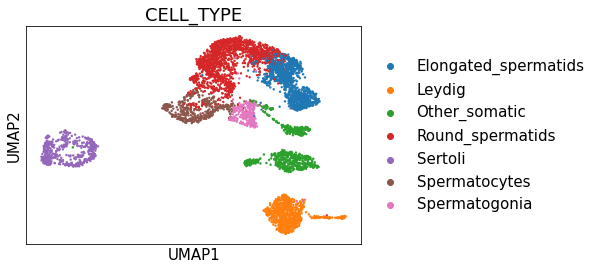

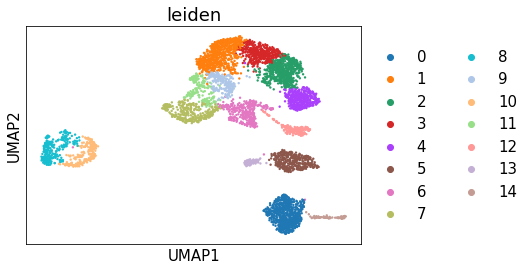

In [22]:
sc.pl.umap(mdata, color=['CELL_TYPE']) # Murat data
sc.pl.umap(mdata, color=['leiden'])

In [23]:
# Transfer CellType Labels
sc.tl.ingest(adata, mdata, obs='CELL_TYPE', embedding_method=[], inplace=True)
    # transferring cell type labels from Murat to main
    # not replacing umap/pca embedding
    # not replacing leiden clustering
# Formatting
adata.uns['CELL_TYPE_colors'] = mdata.uns['CELL_TYPE_colors'] # correct colors
adata.uns['MuratLabels_colors'] = adata.uns['CELL_TYPE_colors']
del adata.uns['CELL_TYPE_colors']
adata.obs['MuratLabels'] = adata.obs['CELL_TYPE']
del adata.obs['CELL_TYPE']

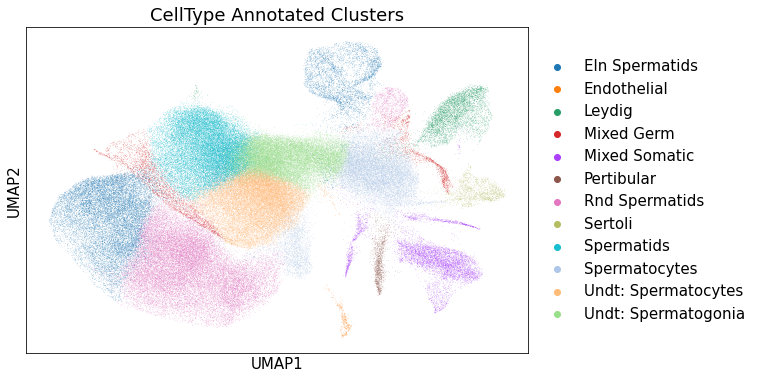

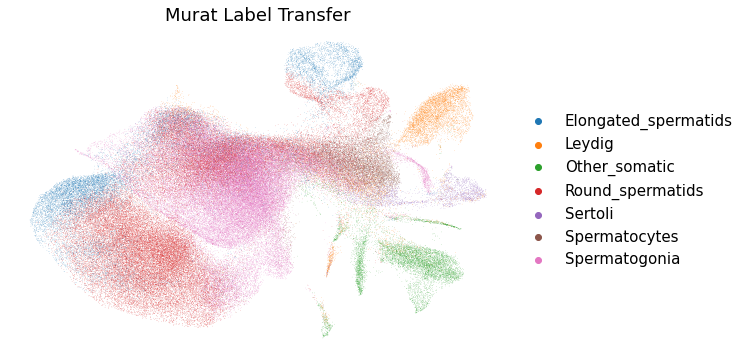

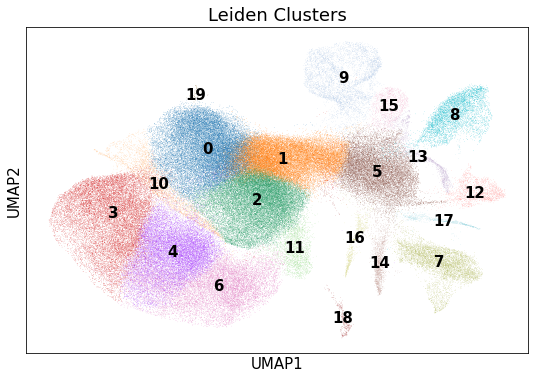

In [24]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (9, 6)}):
    sc.pl.umap(adata, color='ann_cluster', title='CellType Annotated Clusters') # main annotation
    sc.pl.umap(adata, color='MuratLabels', frameon=False, title='Murat Label Transfer') # Murat label transfer
    sc.pl.umap(adata, color='leiden',legend_loc='on data', title='Leiden Clusters')

## Saving Annotated Data

In [25]:
adata.write('study1_filt_clust_anno.h5ad')

## Summary Marker Plot

In [26]:
marker_genes_dict3 = {'Spermatogonia': ['Tex101','Prss50','Gm364','Rhox13','Gfra1','Piwil4','Sall4','Nanos3'],
                     'Spermatocytes': ['Aurka','Syce1','Catsperd','Piwil1','Sycp2','Tcte2'],
                     'Round Spermatids': ['Lrriq1','Cylc2','Acrv1','Spaca1','Galntl5'],
                     'Elongated Spermatids': ['Prm1','Spata3','Plxna2','Gabbr2','Git1'],
                     'Leydig': ['Cyp11a1','Msmo1','Slc7a8','Acvr1','Ldlr','Hmgcs2','Rbm47'],
                     'Sertoli': ['Wt1','Reep1','Gatm','Sema5b','Wipf3','Glp2r','Lrp8os2'],
                      'Pertibular': ['Tagln','Acta2'],
                      'Endothelial': ['Cd34','Tm4sf1'],
                      'Macrophage': ['Apoe'],

                    }

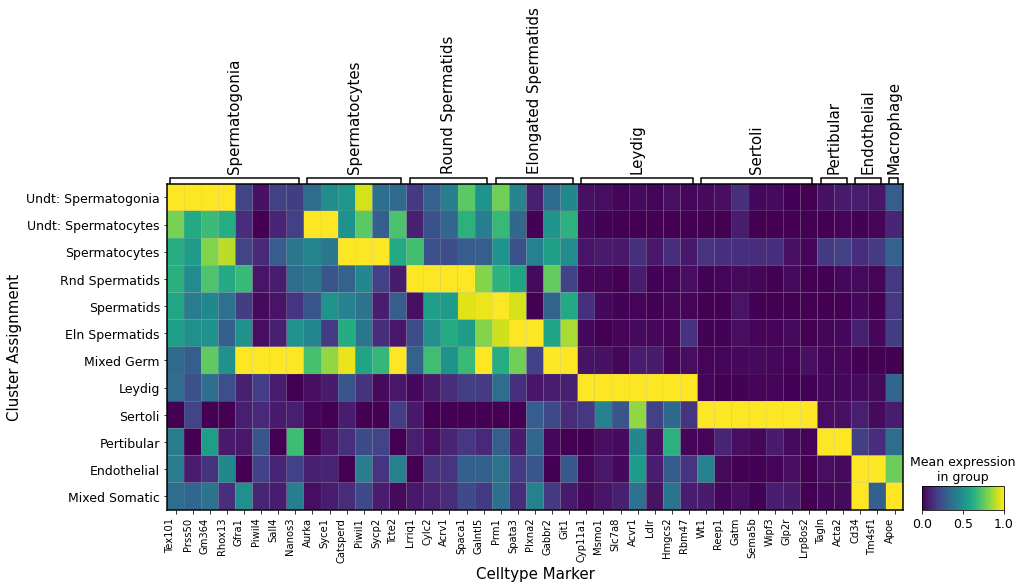

In [27]:
def orderedMatrixPlot(adata):
    new_order = ['Undt: Spermatogonia',
                 'Undt: Spermatocytes',
                 'Spermatocytes',
                 'Rnd Spermatids',
                 'Spermatids',
                 'Eln Spermatids',
                 'Mixed Germ',
                 'Leydig',
                 'Sertoli',
                 'Pertibular',
                 'Endothelial',
                 'Mixed Somatic']
    cat_series = pd.Categorical(adata.obs['ann_cluster'], categories=new_order)

    # assign the new category series to the 'ann_cluster' column of the adata object
    adata.obs['ann_cluster'] = cat_series

    #odata = adata.reorder_categories('ann_cluster', new_order)
    
    # Matrix Plot
    plt.rcParams.update({'font.size': 15})
    g = sc.pl.matrixplot(adata,marker_genes_dict3,'ann_cluster',standard_scale='var',var_group_rotation=90,figsize=(15,6),return_fig=True)
    ax = g.get_axes()['mainplot_ax']
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right',fontsize=10)
    ax.set_xlabel('Celltype Marker')
    ax.set_ylabel('Cluster Assignment')
    plt.show()
orderedMatrixPlot(adata=adata)

## Comparing Cell-Type Labels

In [28]:
# Reading in Metadata
meta = pd.read_csv('../03.CellFiltering/sample_anno.csv',sep=',',index_col=0)

# Cell Type Counts per Group
counts = []
for group in meta['Group'].unique():
    gdata = adata[adata.obs.loc[adata.obs.Group.isin([group])].index.tolist(), ]
    #print(gdata.obs['ann_cluster'])
    #gdata.obs['ann_cluster'].value_counts()
    #print(gdata.obs['ann_cluster'].value_counts())
    counts.append(gdata.obs['ann_cluster'].value_counts().rename(group))
    
celltype_counts = pd.concat(counts, axis=1)
celltype_counts.index.name = 'Cell Type'
celltype_counts

,Vehicle,Challenge,Chall_RefTrtLow,Chall_RefTrtHigh,Chall_Cpd1,Chall_Cpd2
Cell Type,,,,,,
Undt: Spermatogonia,707,2179,1522,10507,4222,5653
Undt: Spermatocytes,3298,1515,1093,11447,3590,3806
Spermatocytes,736,2762,3319,1725,1917,5916
Rnd Spermatids,2956,3050,2800,7655,7937,5825
Spermatids,13010,671,457,6808,3635,1357
Eln Spermatids,1525,2263,2870,7774,4511,3545
Mixed Germ,1253,484,382,1563,525,525
Leydig,545,1062,922,964,847,955
Sertoli,75,333,433,235,247,318


In [30]:
# Comparing Our Annotation to Murat Label Transfer
# Cell Type Data
df = adata.obs[['leiden','ann_cluster','MuratLabels']]
df['leiden'] = pd.to_numeric(df['leiden'], errors="coerce") # Numeric cluster
clusters = sorted(df['leiden'].unique()) # Sorted clusters
# Ranked Gene Data
rankgenes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

labels = []
for cluster in clusters:
    celltype = df[df['leiden']==cluster]['ann_cluster'].values[0] # Corresponding celltype
    subdf = df[df['leiden']==cluster] # Subset, 1 cluster at a time
    counts = subdf['MuratLabels'].value_counts() # Murat counts
    countdf = pd.DataFrame({'MuratCount': counts}) # Series to DataFrame
    countdf = countdf.assign(Cluster=cluster) # Cluster column
    countdf = countdf.assign(CellType=celltype) # CellType column
    # Ranked Genes
    cluster = str(cluster)
    top10 = rankgenes[cluster][:10]
    top10str = ','.join(top10)
    countdf = countdf.assign(RankedGenes=top10str) # Rank Genes column
    # Formatting
    countdf = countdf.reset_index().rename(columns={'index':'MuratCellType'}) # Index to column
    countdf = countdf[['Cluster', 'CellType', 'MuratCellType', 'MuratCount', 'RankedGenes']] # Reorder columns
    labels.append(countdf)
    
combined = pd.concat(labels)
combined = combined.reset_index(drop=True)
combined.to_csv('ann_vs_murat_counts.txt',index=False,sep='\t')

/tmp/ipykernel_117274/866915754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['leiden'] = pd.to_numeric(df['leiden'], errors="coerce") # Numeric cluster


In [32]:
# Cell Type Counts per Group
counts = []
for group in meta['Group'].unique():
    gdata = adata[adata.obs.loc[adata.obs.Group.isin([group])].index.tolist(), ]
    #print(gdata.obs['ann_cluster'])
    #gdata.obs['ann_cluster'].value_counts()
    #print(gdata.obs['ann_cluster'].value_counts())
    counts.append(gdata.obs['MuratLabels'].value_counts().rename(group))
    
celltype_counts2 = pd.concat(counts, axis=1)
celltype_counts2.index.name = 'Cell Type'
celltype_counts2

,Vehicle,Challenge,Chall_RefTrtLow,Chall_RefTrtHigh,Chall_Cpd1,Chall_Cpd2
Cell Type,,,,,,
Elongated_spermatids,3754,1428,1640,6116,2872,2768
Leydig,1154,1668,1630,1369,1188,1723
Other_somatic,652,1834,2035,1297,1317,1384
Round_spermatids,8607,4893,4603,15864,13503,9567
Sertoli,105,633,813,312,329,623
Spermatocytes,270,1659,1910,1249,1204,4016
Spermatogonia,10272,4249,3421,23871,8472,9311


## QC Metrics UMAP

### Study1 Data

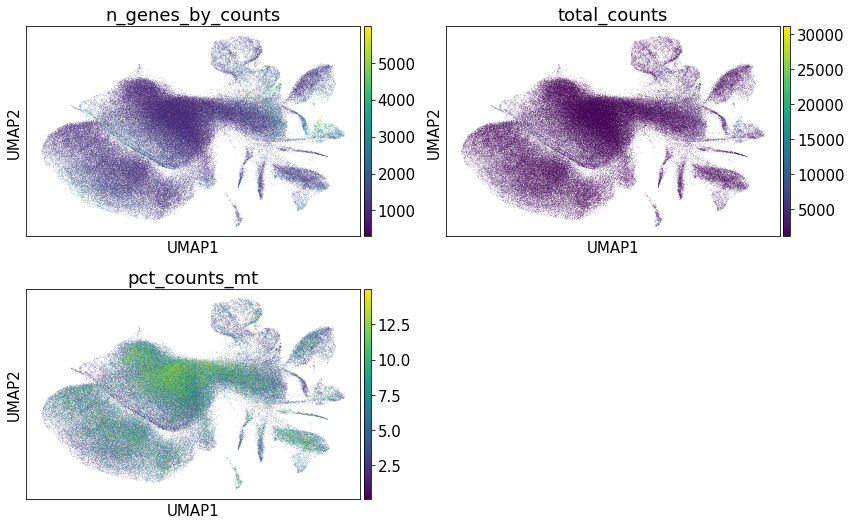

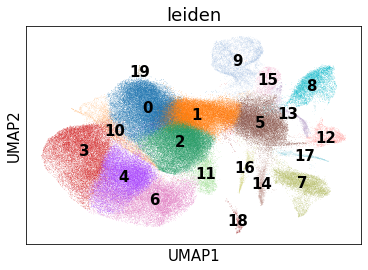

In [33]:
sc.pl.umap(adata,color=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],ncols=2)
sc.pl.umap(adata,color=['leiden'],legend_loc='on data')

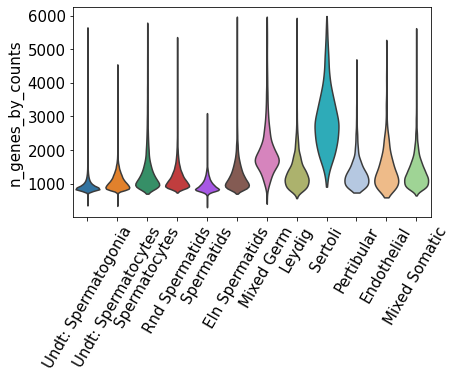

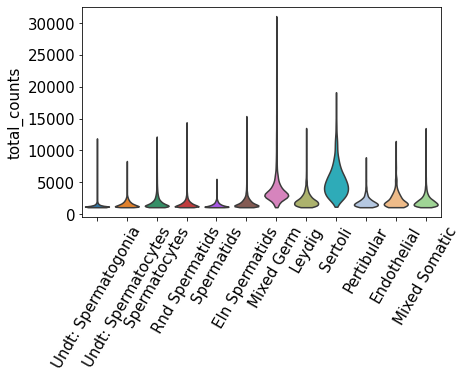

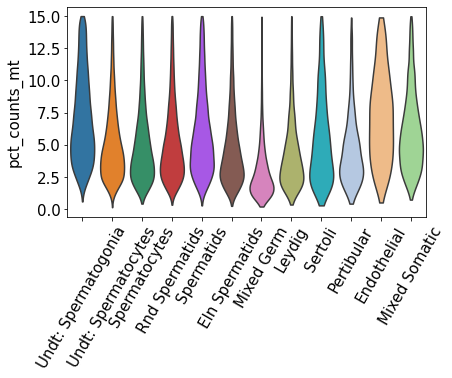

In [34]:
sc.pl.violin(adata,'n_genes_by_counts',groupby='ann_cluster',stripplot=False,rotation=60)
sc.pl.violin(adata,'total_counts',groupby='ann_cluster',stripplot=False,rotation=60)
sc.pl.violin(adata,'pct_counts_mt',groupby='ann_cluster',stripplot=False,rotation=60)

### Murat2021 Data

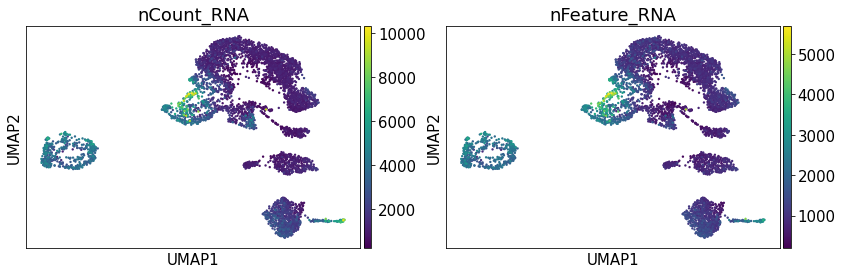

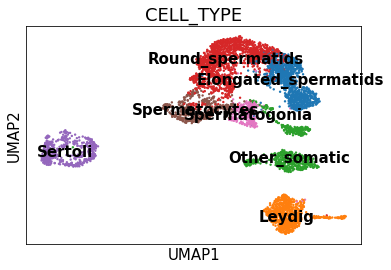

In [35]:
sc.pl.umap(mdata,color=['nCount_RNA','nFeature_RNA'],ncols=2)
sc.pl.umap(mdata,color=['CELL_TYPE'],legend_loc='on data')

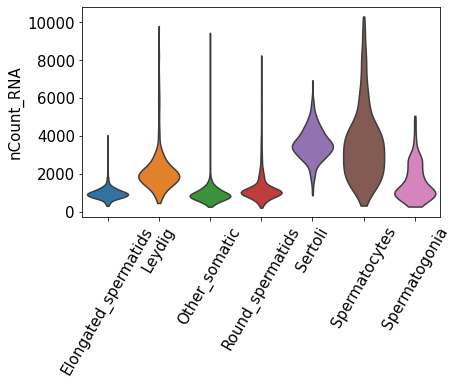

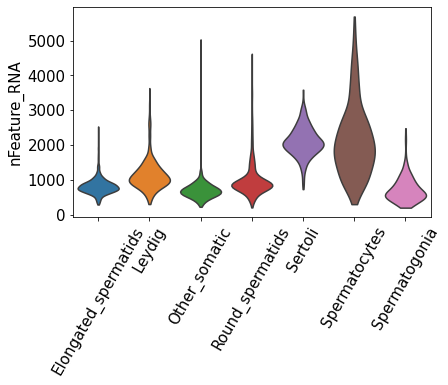

In [38]:
sc.pl.violin(mdata,'nCount_RNA',groupby='CELL_TYPE',stripplot=False,rotation=60)
sc.pl.violin(mdata,'nFeature_RNA',groupby='CELL_TYPE',stripplot=False,rotation=60)